In [1]:
import matplotlib.pyplot as plt
from numpy import *
from scipy.integrate import odeint
#from random import *
from pylab import *

%matplotlib inline

In [9]:
lamda=0.1
gama=0
K=3

#time array
T=150
m=500
t=linspace(0,T,m,endpoint=True)
dt=t[1]-t[0]

In [10]:
def f(c,n):
    return c*(1-c-gama*n)-l*c*(1-K*n)

def g(c,n):
    return l*c*(1-K*n)

In [11]:
def Sys(CN,t=0):
    c=CN[0]
    n=CN[1]
    
    C=2*x-1
    N=pow(c)
    
    return [C,N]

In [34]:
def field(CN,t,n,D):
    c=CN[0:n]
    n=CN[n:2*n]
    
    dc=c*(1-c-gama*n)-lamda*c*(1-K*n)
    dn=lamda*c*(1-K*n)
    
    if not D==0:
        dc+=D*dot(L,transpose(c))
    
    CN=[]
    
    CN.extend(dc)
    CN.extend(dn)
    
    return CN

In [22]:
#steady states
xstar=[0,0]
#xstar = [1-1/K,1/K]

In [23]:
def init_cond(xstar,eps,n):
    xinit = xstar + eps*rand(n,2)
    
    return xinit

In [29]:
init_state=init_cond(xstar,0.3,1)[0]
sol=odeint(field,init_state,t,args=(1,0))
#sol=odeint(field,[1,0],t)

x=sol[:,0]
y=sol[:,1]

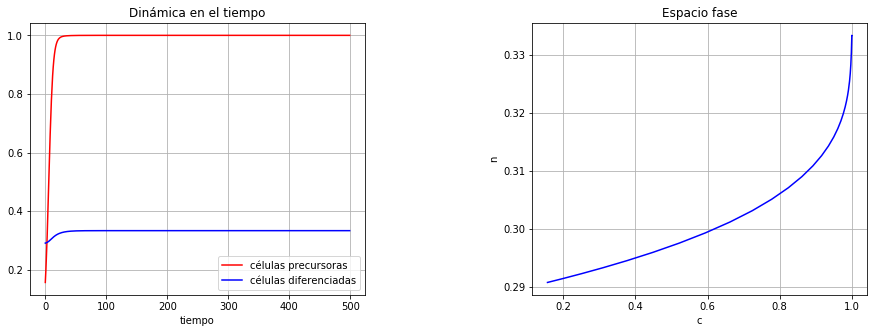

In [30]:
#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(x, 'r-', label='células precursoras')
ax1.plot(y, 'b-', label='células diferenciadas')
ax1.set_title("Dinámica en el tiempo")
ax1.set_xlabel("tiempo")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(x, y, color="blue")
ax2.set_xlabel("c")
ax2.set_ylabel("n")  
ax2.set_title("Espacio fase")
ax2.grid()

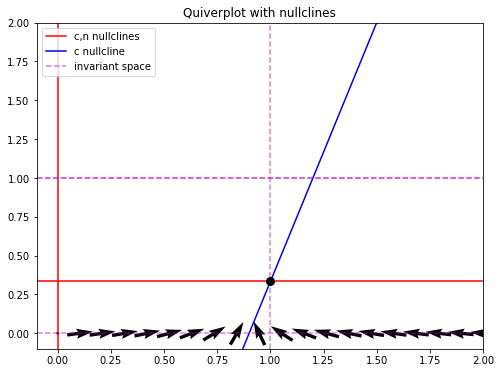

In [44]:
#plot
fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)
ax4.set_xlim(-0.1,2)
ax4.set_ylim(-0.1,2)

x = linspace(0,2,20)
y = arange(0,2,20)

#nullclines
n_c=x/(l*K)+(l-1)/(l*K)

#plot nullclines
ax4.plot([0,0],[-0.1,2],'r',label='c,n nullclines')
ax4.plot(x,n_c,'b',label='c nullcline')
ax4.plot([1,1],[-0.1,2],'m--',label='invariant space',alpha=0.5)
ax4.plot([-0.1,2],[1,1],'m--',alpha=0.5)
ax4.plot([-0.1,2],[1,1],'m--',alpha=0.5)
ax4.axhline(y=1/K,color='r')
ax4.plot([-0.1,2],[0,0],'m--',alpha=0.5)

#fixed points
ax4.plot(1,1/K,"black",marker="o",markersize=8.0)

ax4.set_title("Quiverplot with nullclines")
ax4.legend(loc='best')

#quiver plot

xx=linspace(0,2,20)
yy=linspace(0,2,20)

X1,Y1=meshgrid(x,y)

DX1,DY1=Sys([X1,Y1])

M=hypot(DX1,DY1)

M[M==0]=1

DX1 /= M
DY1 /= M

ax4.quiver(X1,Y1,DX1,DY1,pivot='mid')
#ax4.streamplot(X1,Y1,DX1,DY1,color=U, linewidth=2, cmap=plt.cm.autumn)
ax4.legend()